In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

In [5]:
df=pd.read_csv('iris.csv')

In [6]:
df['Species'].unique()
df['Species']=df['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [8]:
df_y=df[("Species")]

In [9]:
df_x=df.drop(['Species'],axis=1)
df_x=df_x.drop(['Unnamed: 0'],axis=1)

In [10]:
cor=df.drop(['Unnamed: 0'],axis=1)

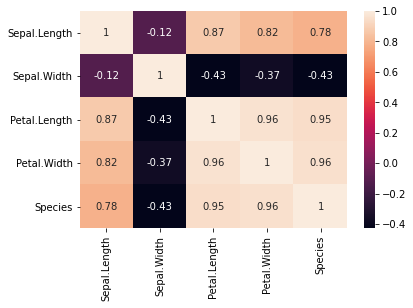

In [11]:

corrMatrix = cor.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
df_y.unique()

array([0, 1, 2], dtype=int64)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.35)

In [14]:
X_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
12,4.8,3.0,1.4,0.1
96,5.7,2.9,4.2,1.3
62,6.0,2.2,4.0,1.0
125,7.2,3.2,6.0,1.8
149,5.9,3.0,5.1,1.8
...,...,...,...,...
60,5.0,2.0,3.5,1.0
71,6.1,2.8,4.0,1.3
85,6.0,3.4,4.5,1.6
81,5.5,2.4,3.7,1.0


In [15]:
X_test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
88,5.6,3.0,4.1,1.3
44,5.1,3.8,1.9,0.4
129,7.2,3.0,5.8,1.6
40,5.0,3.5,1.3,0.3
143,6.8,3.2,5.9,2.3
122,7.7,2.8,6.7,2.0
47,4.6,3.2,1.4,0.2
6,4.6,3.4,1.4,0.3
113,5.7,2.5,5.0,2.0
141,6.9,3.1,5.1,2.3


Text(0, 0.5, 'Accuracy')

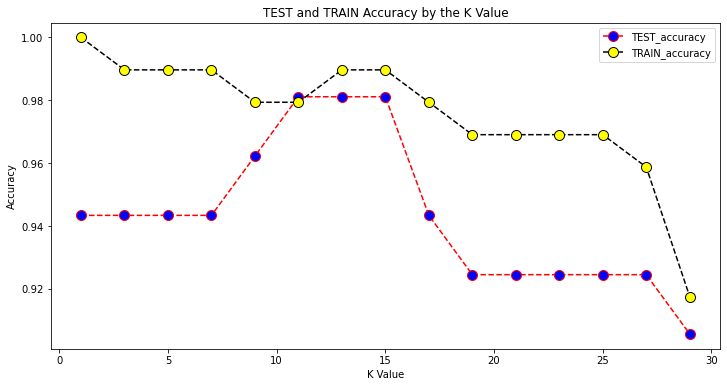

In [16]:
from sklearn.neighbors import KNeighborsClassifier
acc_matrix_test = []
acc_matrix_train = []
# Calculating error for K values between 1 and 40
for i in range(1, 30,2):
    #print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_i_tr= knn.predict(X_train)
    #print("****************************")
    sum_p_test=0
    sum_n_test=0
    sum_p_train=0
    sum_n_train=0
    for ind, y in enumerate(y_test):
        if(y==pred_i[ind]):
            sum_p_test=sum_p_test + 1
        else:
            sum_n_test=sum_n_test + 1
    for ind, y in enumerate(y_train):
        
        if(y==pred_i_tr[ind]):
            sum_p_train=sum_p_train + 1
        else:
            sum_n_train=sum_n_train + 1


    acc_matrix_test.append(sum_p_test/(sum_p_test+sum_n_test))
    acc_matrix_train.append(sum_p_train/(sum_p_train+sum_n_train))



plt.figure(figsize=(12, 6))
plt.plot(range(1, 30,2), acc_matrix_test, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 30,2), acc_matrix_train, color='black', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.legend(['TEST_accuracy','TRAIN_accuracy'])
plt.title('TEST and TRAIN Accuracy by the K Value')

plt.xlabel('K Value')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

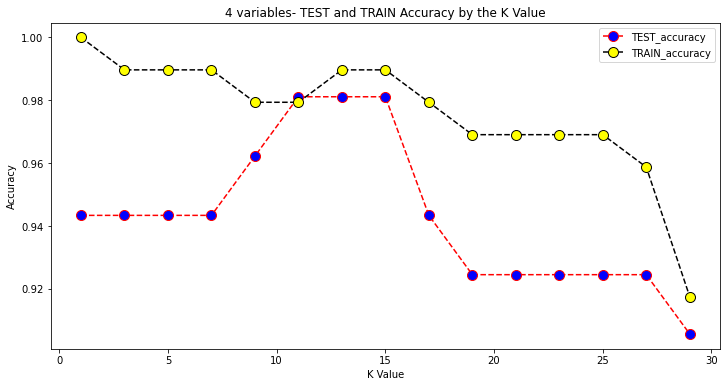

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30,2), acc_matrix_test, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 30,2), acc_matrix_train, color='black', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.legend(['TEST_accuracy','TRAIN_accuracy'])
plt.title('4 variables- TEST and TRAIN Accuracy by the K Value')

plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
pred_i = knn.predict(X_test)
pred_i_tr= knn.predict(X_train)
test_conf=confusion_matrix(y_test,pred_i)
train_conf=confusion_matrix(y_train,pred_i_tr)


In [19]:
test_conf

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  2, 21]], dtype=int64)

In [20]:
train_conf

array([[36,  0,  0],
       [ 0, 34,  0],
       [ 0,  1, 26]], dtype=int64)

In [21]:
X_train['Y']=y_train

In [22]:
X_train
X_train.to_csv('Train_3.csv',index = False)
X_train.to_csv('Train_3.csv',index = False)

In [23]:
X_train_2 = X_train.drop(['Sepal.Length','Sepal.Width','Y'],axis=1)
X_test_2 = X_test.drop(['Sepal.Length','Sepal.Width'],axis=1)


In [24]:
X_train_2

,Petal.Length,Petal.Width
12,1.4,0.1
96,4.2,1.3
62,4.0,1.0
125,6.0,1.8
149,5.1,1.8
...,...,...
60,3.5,1.0
71,4.0,1.3
85,4.5,1.6
81,3.7,1.0


In [25]:
X_test_2

,Petal.Length,Petal.Width
88,4.1,1.3
44,1.9,0.4
129,5.8,1.6
40,1.3,0.3
143,5.9,2.3
122,6.7,2.0
47,1.4,0.2
6,1.4,0.3
113,5.0,2.0
141,5.1,2.3


In [26]:

acc_matrix_test_2 = []
acc_matrix_train_2 = []
# Calculating error for K values between 1 and 40
for i in range(1, 30,2):
    #print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    pred_i_tr= knn.predict(X_train_2)
    sum_p_test=0
    sum_n_test=0
    sum_p_train=0
    sum_n_train=0
    for ind, y in enumerate(y_test):
        if(y==pred_i[ind]):
            sum_p_test=sum_p_test + 1
        else:
            sum_n_test=sum_n_test + 1
    for ind, y in enumerate(y_train):
        
        if(y==pred_i_tr[ind]):
            sum_p_train=sum_p_train + 1
        else:
            sum_n_train=sum_n_train + 1



    acc_matrix_test_2.append(sum_p_test/(sum_p_test+sum_n_test))
    acc_matrix_train_2.append(sum_p_train/(sum_p_train+sum_n_train))





Text(0, 0.5, 'Accuracy')

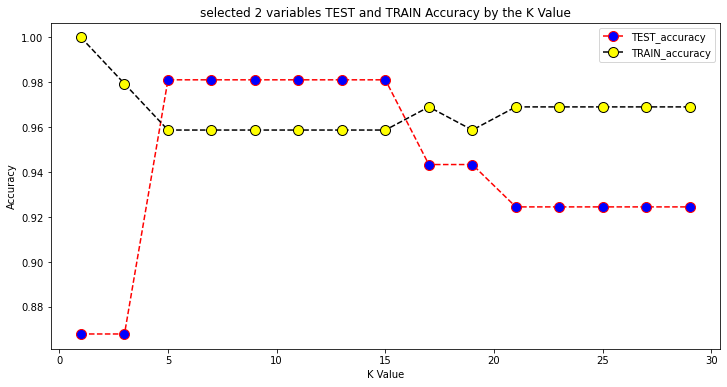

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30,2), acc_matrix_test_2, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 30,2), acc_matrix_train_2, color='black', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.legend(['TEST_accuracy','TRAIN_accuracy'])
plt.title('selected 2 variables TEST and TRAIN Accuracy by the K Value')

plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [28]:
#presitsion
#recall
#KNN clasiifider accuray

In [29]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_2, y_train)
pred_i = knn.predict(X_test_2)
pred_i_tr= knn.predict(X_train_2)


In [30]:

test_conf=confusion_matrix(y_test,pred_i)
train_conf=confusion_matrix(y_train,pred_i_tr)

In [31]:
test_conf

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 23]], dtype=int64)

In [32]:
test_conf

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 23]], dtype=int64)

In [33]:
train_conf

array([[36,  0,  0],
       [ 0, 32,  2],
       [ 0,  2, 25]], dtype=int64)